In [ ]:
!nvidia-smi

Fri Nov  6 09:21:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 460kB 51.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ByJN0Vh4ctIwNdnO2jevEcBgrbRHuNyM" -O "ratings_train.txt"
!wget "https://drive.google.com/uc?export=download&id=1fNm-8pQJsuDbFaVIMow1DI-7lsnNLRFB" -O "ratings_test.txt"

--2020-11-06 09:23:14--  https://drive.google.com/uc?export=download&id=1ByJN0Vh4ctIwNdnO2jevEcBgrbRHuNyM
Resolving drive.google.com (drive.google.com)... 173.194.79.138, 173.194.79.139, 173.194.79.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0m24l7ugoo7o8vg1ujg6bq3gf4d4md5/1604654550000/13472183013488020071/*/1ByJN0Vh4ctIwNdnO2jevEcBgrbRHuNyM?e=download [following]
--2020-11-06 09:23:15--  https://doc-0o-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0m24l7ugoo7o8vg1ujg6bq3gf4d4md5/1604654550000/13472183013488020071/*/1ByJN0Vh4ctIwNdnO2jevEcBgrbRHuNyM?e=download
Resolving doc-0o-94-docs.googleusercontent.com (doc-0o-94-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-0o-94-docs.googleusercontent.com (doc-0o

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
train_data

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...,...
145786,149995,6222902,인간이 문제지 소는 뭔죄인가,0
145787,149996,8549745,평점이 너무 낮아서,1
145788,149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
145789,149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab  = Mecab()

In [ ]:
X_train = [mecab.morphs(sentence) for sentence in train_data['document']]

In [ ]:
print(X_train[:3])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


In [ ]:
X_test = [mecab.morphs(sentence) for sentence in test_data['document']]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'이': 1, '는': 2, '영화': 3, '다': 4, '고': 5, '하': 6, '도': 7, '의': 8, '가': 9, '은': 10, '에': 11, '을': 12, '보': 13, '한': 14, '게': 15, '들': 16, '지': 17, '를': 18, '있': 19, '없': 20, '좋': 21, '나': 22, '었': 23, '만': 24, '는데': 25, '너무': 26, '봤': 27, '적': 28, '안': 29, '정말': 30, '로': 31, '으로': 32, '것': 33, '음': 34, '아': 35, '네요': 36, '어': 37, '재밌': 38, '지만': 39, '같': 40, '진짜': 41, '에서': 42, '했': 43, '기': 44, '네': 45, '않': 46, '점': 47, '거': 48, '았': 49, '수': 50, '되': 51, '면': 52, 'ㅋㅋ': 53, '과': 54, '인': 55, '말': 56, '연기': 57, '잘': 58, '주': 59, '최고': 60, '내': 61, '평점': 62, '이런': 63, '던': 64, '와': 65, '어요': 66, '할': 67, '왜': 68, '겠': 69, '스토리': 70, '해': 71, 'ㅋㅋㅋ': 72, '습니다': 73, '듯': 74, '아니': 75, '드라마': 76, '생각': 77, '더': 78, '그': 79, '싶': 80, '사람': 81, '때': 82, '감동': 83, '배우': 84, '함': 85, '본': 86, '까지': 87, '좀': 88, '뭐': 89, '알': 90, '만들': 91, '내용': 92, '볼': 93, '보다': 94, '감독': 95, '라': 96, '재미': 97, '그냥': 98, '시간': 99, '지루': 100, '중': 101, '재미있': 102, '였': 103, '잼': 104, '년': 105, '사랑': 106, '못': 1

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [ ]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 49964
등장 빈도가 2번 이하인 희귀 단어의 수: 28321
단어 집합에서 희귀 단어의 비율: 56.68281162436954
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.4670439369879944


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21645


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[36, 79, 910, 42, 228, 23, 37, 714], [992, 496, 506, 651, 4, 123, 1569, 58, 881, 964, 18, 47, 378], [27, 206, 1]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
drop_train

[404,
 412,
 470,
 1305,
 1541,
 2199,
 2280,
 3538,
 4691,
 4854,
 4929,
 4982,
 5068,
 5088,
 5173,
 5719,
 6195,
 6399,
 7499,
 8541,
 8696,
 9147,
 9413,
 9476,
 9523,
 9567,
 10596,
 10632,
 11169,
 11618,
 11893,
 12001,
 12381,
 13041,
 13604,
 13733,
 13745,
 13927,
 14255,
 14536,
 14670,
 15210,
 15873,
 16044,
 16342,
 17535,
 17792,
 17929,
 18517,
 19327,
 19428,
 19654,
 20455,
 20836,
 21790,
 22201,
 22312,
 22474,
 22489,
 22801,
 22818,
 22838,
 23014,
 23066,
 23099,
 24834,
 25864,
 26604,
 27794,
 28594,
 29259,
 29628,
 29641,
 29642,
 30191,
 30218,
 30472,
 30487,
 30562,
 30574,
 30988,
 31138,
 31405,
 31521,
 31608,
 31680,
 32111,
 32645,
 32850,
 32898,
 33430,
 33466,
 33533,
 34037,
 34465,
 34618,
 35277,
 35469,
 35603,
 35622,
 35720,
 36149,
 36856,
 37364,
 37816,
 38002,
 38239,
 39768,
 40142,
 40224,
 40974,
 41040,
 41746,
 41785,
 41990,
 42489,
 42780,
 43308,
 43531,
 43632,
 43936,
 44213,
 44257,
 44393,
 44886,
 44993,
 45295,
 46114,
 4642

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

In [ ]:
print(len(X_train))
print(len(y_train))

145393
145393


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 16.56321831174816


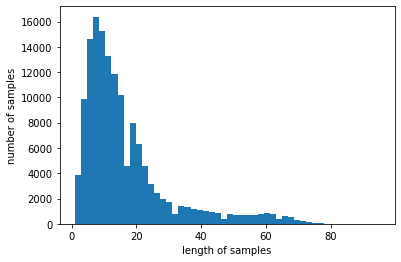

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 87.52209528656813


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 128)           2770560   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 3,165,057
Trainable params: 3,165,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=126,
                    validation_split=0.2)

Epoch 1/10
924/924 [==============================] - 15s 17ms/step - loss: 0.3954 - accuracy: 0.8214 - val_loss: 0.3801 - val_accuracy: 0.8302
Epoch 2/10
924/924 [==============================] - 15s 16ms/step - loss: 0.3186 - accuracy: 0.8626 - val_loss: 0.3410 - val_accuracy: 0.8553
Epoch 3/10
924/924 [==============================] - 15s 17ms/step - loss: 0.2899 - accuracy: 0.8780 - val_loss: 0.3211 - val_accuracy: 0.8649
Epoch 4/10
924/924 [==============================] - 15s 16ms/step - loss: 0.2676 - accuracy: 0.8890 - val_loss: 0.3310 - val_accuracy: 0.8650
Epoch 5/10
924/924 [==============================] - 15s 16ms/step - loss: 0.2472 - accuracy: 0.8998 - val_loss: 0.3213 - val_accuracy: 0.8641
Epoch 6/10
924/924 [==============================] - 16s 17ms/step - loss: 0.2273 - accuracy: 0.9098 - val_loss: 0.3303 - val_accuracy: 0.8622
Epoch 7/10
924/924 [==============================] - 15s 16ms/step - loss: 0.2085 - accuracy: 0.9189 - val_loss: 0.3357 - val_accuracy:

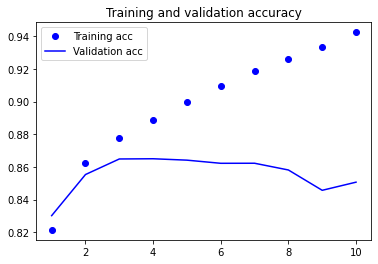

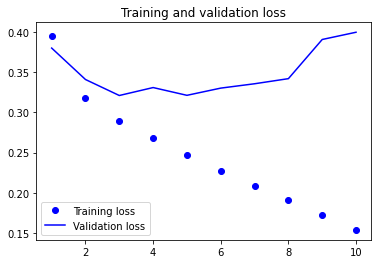

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

1532/1532 [==============================] - 4s 3ms/step - loss: 0.4111 - accuracy: 0.8464


In [ ]:
model.save('naver-ratings-classification.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('naver-ratings-classification.h5')

In [ ]:
def sentiment_predict(new_sentence):
  # 토큰화
  new_sentence = mecab.morphs(new_sentence)
  # 정수 인코딩
  encoded = tokenizer.texts_to_sequences([new_sentence])
  # 패딩  
  pad_new = pad_sequences(encoded, maxlen = max_len)
  # 예측
  score = float(loaded_model.predict(pad_new))
  
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 이네요~ ㅎㅎㅎ')

94.15% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('배우들이 발로 연기함 -_-;;')

96.39% 확률로 부정 리뷰입니다.

